In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from ML_Pipeline.utils import read_data,inspection,null_values
from ML_Pipeline.encoding import encode_categories
from ML_Pipeline.stats_model import logistic_regression
from ML_Pipeline.ml_model import prepare_model,run_model
from ML_Pipeline.evaluate_metrics import confusion_matrix,roc_curve
from ML_Pipeline.imbalanced_data import run_model_bweights,run_model_aweights,adjust_imbalance,prepare_model_smote
from ML_Pipeline.feature_engg import var_threshold_selection,rfe_selection

In [14]:
# Read the initial datasets
datapath = 'input/DS_Job_Change_Data.csv'
df = read_data(datapath)

In [15]:
# Inspection and cleaning the data
x = inspection(df)

Types of the variables we are working with:
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object
Total Samples with missing values:
10203
Total Missing Values per Variable
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours     

In [20]:
column_names = df.columns.tolist() #list the column names from dataframe
target = column_names[-1] #select the target column
cols_to_exclude = column_names[0:3] #columns to exclude because are not relevant

In [21]:
# Drop the null values
df = null_values(df)

In [22]:
# Encoding categorical variables
en = encode_categories(df,cols_to_exclude)

In [23]:
                 ### Run the logistic regression model with statsmodel ###
import os

model_stats = logistic_regression(df, target, cols_to_exclude)

output_dir = 'ouput'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'model_stats.pkl')

pickle.dump(model_stats, open(output_file, 'wb'))

Optimization terminated successfully.
         Current function value: 0.376152
         Iterations 6


In [24]:
                 ### Run the logistics regression model with sklearn ###

##Selecting only the numerical columns and excluding the columns we specified in the function
X_train, X_test, y_train, y_test = prepare_model(df, target,
                                                 cols_to_exclude)

In [25]:
# run the model
model_log,y_pred = run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      2212
         1.0       0.59      0.11      0.19       475

    accuracy                           0.83      2687
   macro avg       0.71      0.55      0.55      2687
weighted avg       0.79      0.83      0.78      2687

The area under the curve is: 0.55


In [26]:
## performance metric ##
conf_matrix = confusion_matrix(y_test,y_pred)

[[2174   38]
 [ 421   54]]
TN: 2174.00
TP: 54.00
FP: 38.00
FN: 421.00


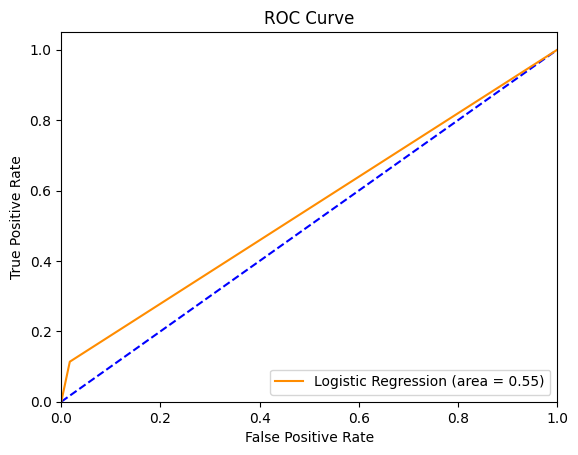

In [27]:
#print(conf_matrix)
roc_val = roc_curve(model_log,X_test,y_test)

In [28]:
## Save the model ##
#output_dir = 'ouput'
#os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'model1.pkl')
pickle.dump(model_stats, open(output_file, 'wb'))

In [29]:
                     ### Dealing with imbalanced data ###
                    
# model with default parameter for balancing the data
balanced_model1 = run_model_bweights(X_train,X_test,y_train,y_test)
output_file = os.path.join(output_dir, 'balanced1_model.pkl')
pickle.dump(model_stats, open(output_file, 'wb'))

In [30]:
# model with w as an input to balance the data
balanced_model2 = run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})
output_file = os.path.join(output_dir, 'balanced2_model.pkl')
pickle.dump(model_stats, open(output_file, 'wb'))

In [35]:
#model with adjusting the imbalance data
resampled_df = adjust_imbalance (X_train,y_train,class_col)
X_train,X_test,y_train,y_test = prepare_model(resampled_df, target,cols_to_exclude)
adj_bal = run_model(X_train,X_test,y_train,y_test)

output_file = os.path.join(output_dir, 'adjusted_model.pkl')
pickle.dump(model_stats, open(output_file, 'wb'))

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76      1596
         1.0       0.77      0.68      0.72      1560

    accuracy                           0.74      3156
   macro avg       0.74      0.74      0.74      3156
weighted avg       0.74      0.74      0.74      3156

The area under the curve is: 0.74


In [36]:
# model with SMOTE
X_train,X_test,y_train,y_test = prepare_model_smote(df,target,
                                                    cols_to_exclude)
smote_model,y_pred = run_model(X_train,X_test,y_train,y_test)

output_file = os.path.join(output_dir, 'smote_model.pkl')
pickle.dump(model_stats, open(output_file, 'wb'))


              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      2212
         1.0       0.39      0.60      0.47       475

    accuracy                           0.76      2687
   macro avg       0.65      0.70      0.66      2687
weighted avg       0.81      0.76      0.78      2687

The area under the curve is: 0.70


In [39]:
                        ### Perform Feature Engineering ###
 # perform feature selection with var feature
var_feature = var_threshold_selection(df,cols_to_exclude,
                                      target,threshold=1)


The selected features are: 
['city_code']


In [43]:
 # create a LR model with var features
X_train,X_test,y_train,y_test = prepare_model(resampled_df,target,cols_to_exclude=column_names)
model_var_feat = run_model(X_train,X_test,y_train,y_test)

output_file = os.path.join(output_dir, 'model_var_feat.pkl')
pickle.dump(model_stats, open(output_file, 'wb'))

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76      1596
         1.0       0.77      0.68      0.72      1560

    accuracy                           0.74      3156
   macro avg       0.74      0.74      0.74      3156
weighted avg       0.74      0.74      0.74      3156

The area under the curve is: 0.74


In [47]:
# perform feature selection with var feature
rfe_sel = rfe_selection(df,class_col = class_col, cols_to_exclude = cols_to_exclude, model = model_log)

The selected features are: 
['city_code', 'city_development_index_code']


In [51]:
X_train,X_test,y_train,y_test = prepare_model(resampled_df,class_col =class_col, cols_to_exclude= column_names)
model_rfe_feat = run_model(X_train,X_test,y_train,y_test)

output_file = os.path.join(output_dir, 'model_rfe_feat.pkl')
pickle.dump(model_stats, open(output_file, 'wb'))

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76      1596
         1.0       0.77      0.68      0.72      1560

    accuracy                           0.74      3156
   macro avg       0.74      0.74      0.74      3156
weighted avg       0.74      0.74      0.74      3156

The area under the curve is: 0.74
